In [87]:
%matplotlib inline

import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from PIL import Image

In [88]:
!ls val/cat

cat_0006.jpg cat_0167.jpg cat_0298.jpg cat_0482.jpg cat_0598.jpg cat_0712.jpg
cat_0011.jpg cat_0169.jpg cat_0316.jpg cat_0484.jpg cat_0612.jpg cat_0723.jpg
cat_0022.jpg cat_0173.jpg cat_0319.jpg cat_0494.jpg cat_0615.jpg cat_0738.jpg
cat_0048.jpg cat_0177.jpg cat_0322.jpg cat_0495.jpg cat_0622.jpg cat_0748.jpg
cat_0050.jpg cat_0184.jpg cat_0325.jpg cat_0510.jpg cat_0632.jpg cat_0775.jpg
cat_0055.jpg cat_0187.jpg cat_0368.jpg cat_0511.jpg cat_0634.jpg cat_0777.jpg
cat_0059.jpg cat_0208.jpg cat_0369.jpg cat_0513.jpg cat_0640.jpg cat_0801.jpg
cat_0064.jpg cat_0217.jpg cat_0383.jpg cat_0520.jpg cat_0656.jpg cat_0803.jpg
cat_0073.jpg cat_0220.jpg cat_0385.jpg cat_0522.jpg cat_0660.jpg cat_0818.jpg
cat_0092.jpg cat_0222.jpg cat_0386.jpg cat_0526.jpg cat_0662.jpg cat_0822.jpg
cat_0114.jpg cat_0225.jpg cat_0395.jpg cat_0530.jpg cat_0673.jpg cat_0836.jpg
cat_0124.jpg cat_0226.jpg cat_0407.jpg cat_0544.jpg cat_0680.jpg cat_0843.jpg
cat_0128.jpg cat_0228.jpg cat_0428.jpg cat_0569.jpg cat_0686.jpg

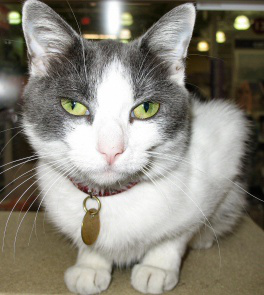

In [89]:
image = Image.open('val/cat/cat_0383.jpg')
image

# Difference between manual transforming and using the ToTensor class

In [90]:
tensor = torch.tensor(np.array(image)).float()

print('SHAPE:', tensor.shape)
print('MAX:', tensor.max())
print('MIN:', tensor.min())
print('MEAN:', tensor.mean())
print('STD:', tensor.std())

SHAPE: torch.Size([295, 264, 3])
MAX: tensor(255.)
MIN: tensor(0.)
MEAN: tensor(131.2986)
STD: tensor(71.8252)


In [91]:
transforms = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
])

tensor = transforms(image)

print('SHAPE:', tensor.shape)
print('MAX:', tensor.max())
print('MIN:', tensor.min())
print('MEAN:', tensor.mean())
print('STD:', tensor.std())

SHAPE: torch.Size([3, 295, 264])
MAX: tensor(1.)
MIN: tensor(0.)
MEAN: tensor(0.5149)
STD: tensor(0.2817)


# Exploring the convolution layer

Source 1: https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939

Source 2: https://medium.com/apache-mxnet/multi-channel-convolutions-explained-with-ms-excel-9bbf8eb77108

In [94]:
conv = torch.nn.Conv2d(in_channels=3, out_channels=64, kernel_size=(3, 3), padding=(1, 1))

In [105]:
tensor = transforms(image)

X = tensor[None,:,:,:]

print('BEFORE:', X.shape)
Y = conv(X)
print('AFTER:', Y.shape)
print()
print('WEIGHTS:', conv.weight.shape)
print('BIAS:', conv.bias.shape)

BEFORE: torch.Size([1, 3, 224, 224])
AFTER: torch.Size([1, 64, 224, 224])

WEIGHTS: torch.Size([64, 3, 3, 3])
BIAS: torch.Size([64])


# Exploring the convolution layer (batch)

In [96]:
image_1 = Image.open('val/cat/cat_0383.jpg')
image_2 = Image.open('val/cat/cat_0177.jpg')
image_3 = Image.open('val/cat/cat_0124.jpg')

In [97]:
transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
])

tensor_1 = transforms(image_1)
tensor_2 = transforms(image_2)
tensor_3 = transforms(image_3)

In [100]:
tensor_1.shape

torch.Size([3, 224, 224])

In [101]:
batch = torch.stack([tensor_1, tensor_2, tensor_3], dim=0)

In [102]:
batch.shape

torch.Size([3, 3, 224, 224])

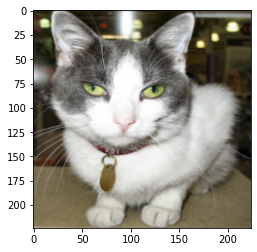

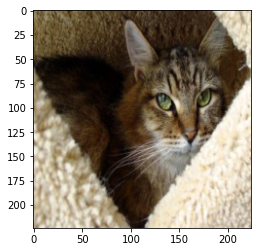

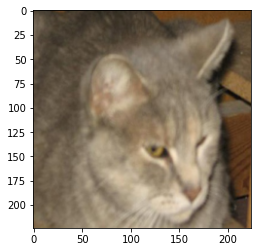

In [106]:
for i in range(len(batch)):
    plt.imshow(batch[i].permute(1, 2, 0))
    plt.show()

In [107]:
conv = torch.nn.Conv2d(in_channels=3, out_channels=64, kernel_size=(3, 3), padding=(1, 1))

In [108]:
X = batch

print('BEFORE:', X.shape)
Y = conv(X)
print('AFTER:', Y.shape)
print()
print('WEIGHTS:', conv.weight.shape)
print('BIAS:', conv.bias.shape)

BEFORE: torch.Size([3, 3, 224, 224])
AFTER: torch.Size([3, 64, 224, 224])

WEIGHTS: torch.Size([64, 3, 3, 3])
BIAS: torch.Size([64])


# Kernels are Filters

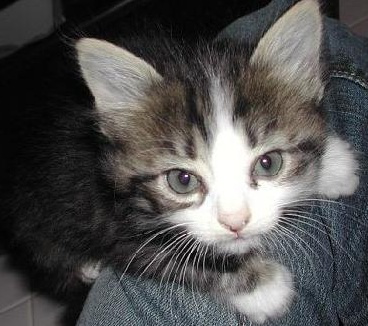

In [109]:
image = Image.open('val/cat/cat_0707.jpg')
image

In [111]:
transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.Grayscale(),
    torchvision.transforms.ToTensor(),
])

tensor = transforms(image)

print('SHAPE:', tensor.shape)
print('MAX:', tensor.max())
print('MIN:', tensor.min())
print('MEAN:', tensor.mean())
print('STD:', tensor.std())

SHAPE: torch.Size([1, 224, 224])
MAX: tensor(1.)
MIN: tensor(0.0039)
MEAN: tensor(0.3159)
STD: tensor(0.2556)


In [112]:
conv = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(3, 3), padding=(1, 1))

conv.bias[0] = 0
conv.weight[0,0,:,:] = 0

conv.weight[0,0,0,0] = 1
conv.weight[0,0,1,0] = 1
conv.weight[0,0,2,0] = 1

conv.weight[0,0,0,2] = -1
conv.weight[0,0,1,2] = -1
conv.weight[0,0,2,2] = -1

print('Weight:', conv.weight)
print()
print('Bias:', conv.bias)

Weight: Parameter containing:
tensor([[[[ 1.,  0., -1.],
          [ 1.,  0., -1.],
          [ 1.,  0., -1.]]]], grad_fn=<CopySlices>)

Bias: Parameter containing:
tensor([0.], grad_fn=<CopySlices>)


In [114]:
X = tensor.unsqueeze(0)

print('BEFORE:', X.shape)
Y = conv(X).detach()
print('AFTER:', Y.shape)

BEFORE: torch.Size([1, 1, 224, 224])
AFTER: torch.Size([1, 1, 224, 224])


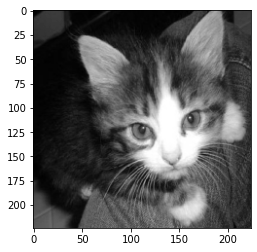

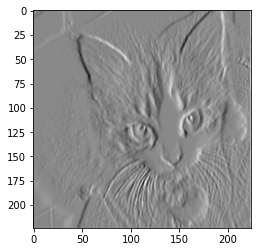

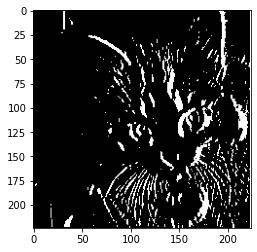

In [115]:
plt.imshow(X.squeeze(), cmap='gray')
plt.show()

plt.imshow(Y.squeeze(), cmap='gray')
plt.show()

plt.imshow(Y.squeeze() > 0.2, cmap='gray')
plt.show()

# More complex filter

In [116]:
conv_dx = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(3, 3), padding=(1, 1))

conv_dx.bias[0] = 0
conv_dx.weight[0,0,:,:] = 0

conv_dx.weight[0,0,0,0] = -1
conv_dx.weight[0,0,1,0] = -2
conv_dx.weight[0,0,2,0] = -1

conv_dx.weight[0,0,0,2] = 1
conv_dx.weight[0,0,1,2] = 2
conv_dx.weight[0,0,2,2] = 1

print('Weight:', conv_dx.weight)
print()
print('Bias:', conv_dx.bias)

Weight: Parameter containing:
tensor([[[[-1.,  0.,  1.],
          [-2.,  0.,  2.],
          [-1.,  0.,  1.]]]], grad_fn=<CopySlices>)

Bias: Parameter containing:
tensor([0.], grad_fn=<CopySlices>)


In [117]:
X = tensor.unsqueeze(0)

print('BEFORE:', X.shape)
Y_dx = conv_dx(X).detach()
print('AFTER:', Y_dx.shape)

BEFORE: torch.Size([1, 1, 224, 224])
AFTER: torch.Size([1, 1, 224, 224])


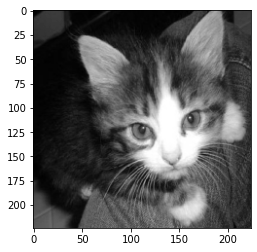

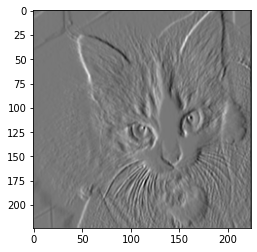

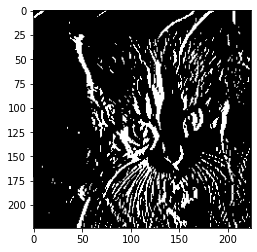

In [118]:
plt.imshow(X.squeeze(), cmap='gray')
plt.show()

plt.imshow(Y_dx.squeeze(), cmap='gray')
plt.show()

plt.imshow(Y_dx.squeeze() > 0.2, cmap='gray')
plt.show()

In [119]:
conv_dy = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(3, 3), padding=(1, 1))

conv_dy.bias[0] = 0
conv_dy.weight[0,0,:,:] = 0

conv_dy.weight[0,0,0,0] = 1
conv_dy.weight[0,0,0,1] = 2
conv_dy.weight[0,0,0,2] = 1

conv_dy.weight[0,0,2,0] = -1
conv_dy.weight[0,0,2,1] = -2
conv_dy.weight[0,0,2,2] = -1

print('Weight:', conv_dy.weight)
print()
print('Bias:', conv_dy.bias)

Weight: Parameter containing:
tensor([[[[ 1.,  2.,  1.],
          [ 0.,  0.,  0.],
          [-1., -2., -1.]]]], grad_fn=<CopySlices>)

Bias: Parameter containing:
tensor([0.], grad_fn=<CopySlices>)


In [120]:
X = tensor.unsqueeze(0)

print('BEFORE:', X.shape)
Y_dy = conv_dy(X).detach()
print('AFTER:', Y_dy.shape)

BEFORE: torch.Size([1, 1, 224, 224])
AFTER: torch.Size([1, 1, 224, 224])


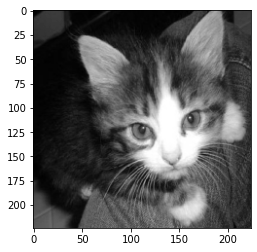

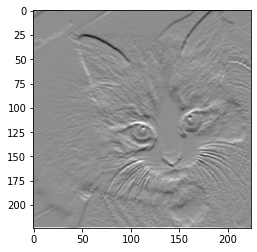

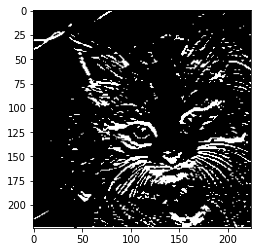

In [121]:
plt.imshow(X.squeeze(), cmap='gray')
plt.show()

plt.imshow(Y_dy.squeeze(), cmap='gray')
plt.show()

plt.imshow(Y_dy.squeeze() > 0.2, cmap='gray')
plt.show()

In [122]:
Y = Y_dx + Y_dy

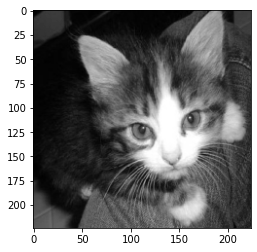

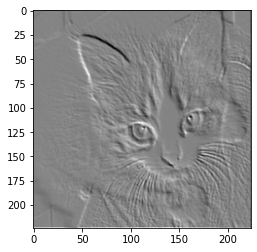

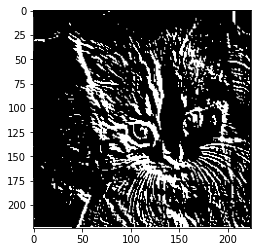

In [123]:
plt.imshow(X.squeeze(), cmap='gray')
plt.show()

plt.imshow(Y.squeeze(), cmap='gray')
plt.show()

plt.imshow(Y.squeeze() > 0.2, cmap='gray')
plt.show()